<a href="https://colab.research.google.com/github/luizfilipisousamoura/QuantumComputing/blob/main/QuantumComputingWithQiskit/35_BernsteinVaziraniAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=ff4629e3fd6727d4db6e6c7e8aa955b4d4f717786a4a4fc86aaba36de809baec
  Stored in directory: /root/.cache/pip/wheels/72/99/be/81d9bcdf5dd5ee5acd8119a9dd5bc07204c9ce205fd341b021
Successfully built pylatexenc


In [ ]:
secret = '100101'

In [ ]:
n = len(secret)

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
q = QuantumRegister(n+1)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)

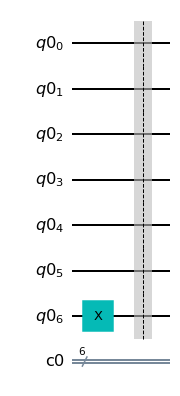

In [ ]:
qc.x(q[n])
qc.barrier()
qc.draw('mpl')

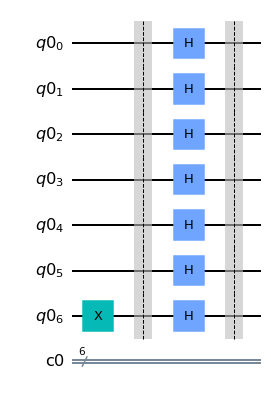

In [ ]:
for i in range(n+1):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

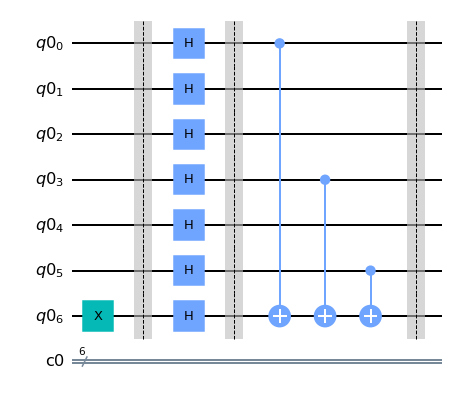

In [ ]:
for i in range(n):
    if secret[i]=='1':
        qc.cx(q[i],q[n])
qc.barrier()
qc.draw('mpl')

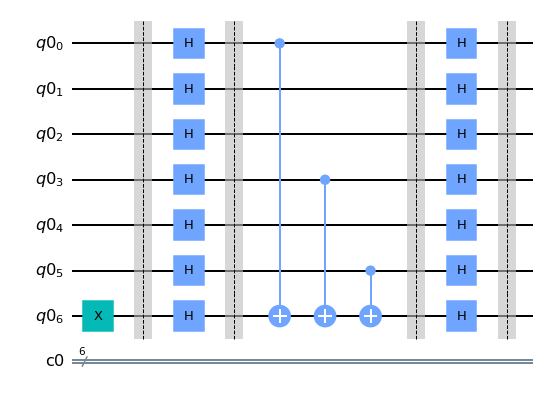

In [ ]:
for i in range(n+1):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

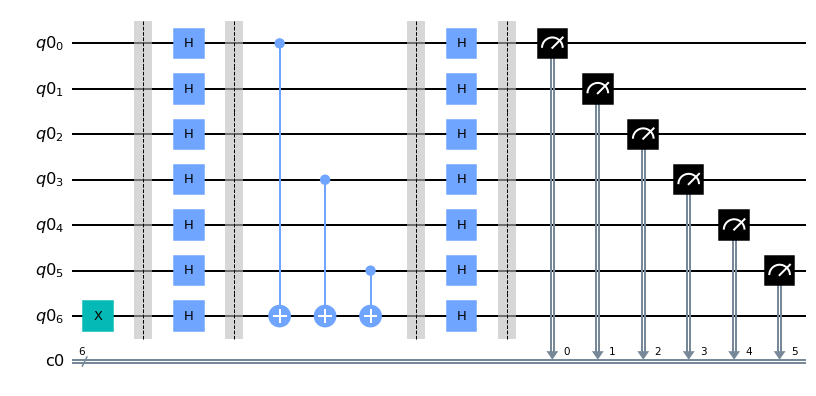

In [ ]:
for i in range(n):
    qc.measure(q[i],c[i])
qc.draw('mpl')

{'101001': 1024}


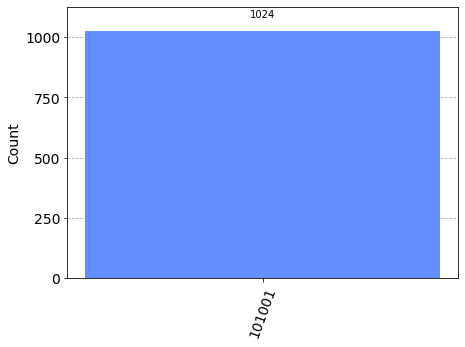

In [ ]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
from qiskit.test.mock import FakeCambridge
device_simulation = FakeCambridge()

<ipython-input-12-058dc7e02911>:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeCambridge


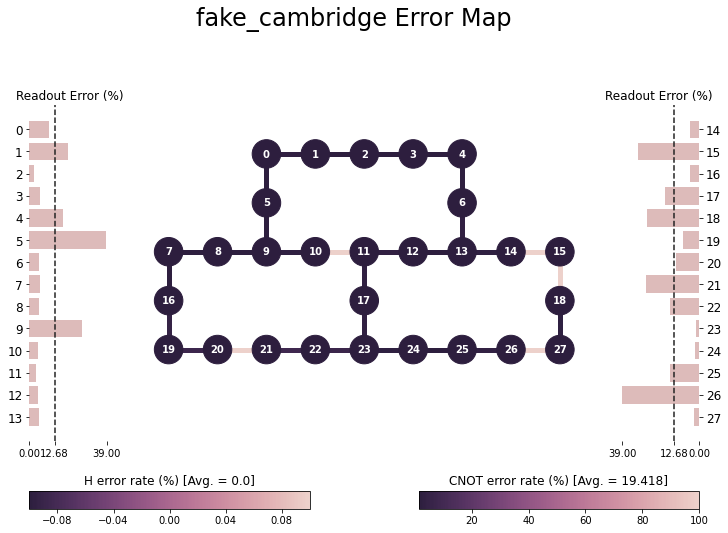

In [ ]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulation)

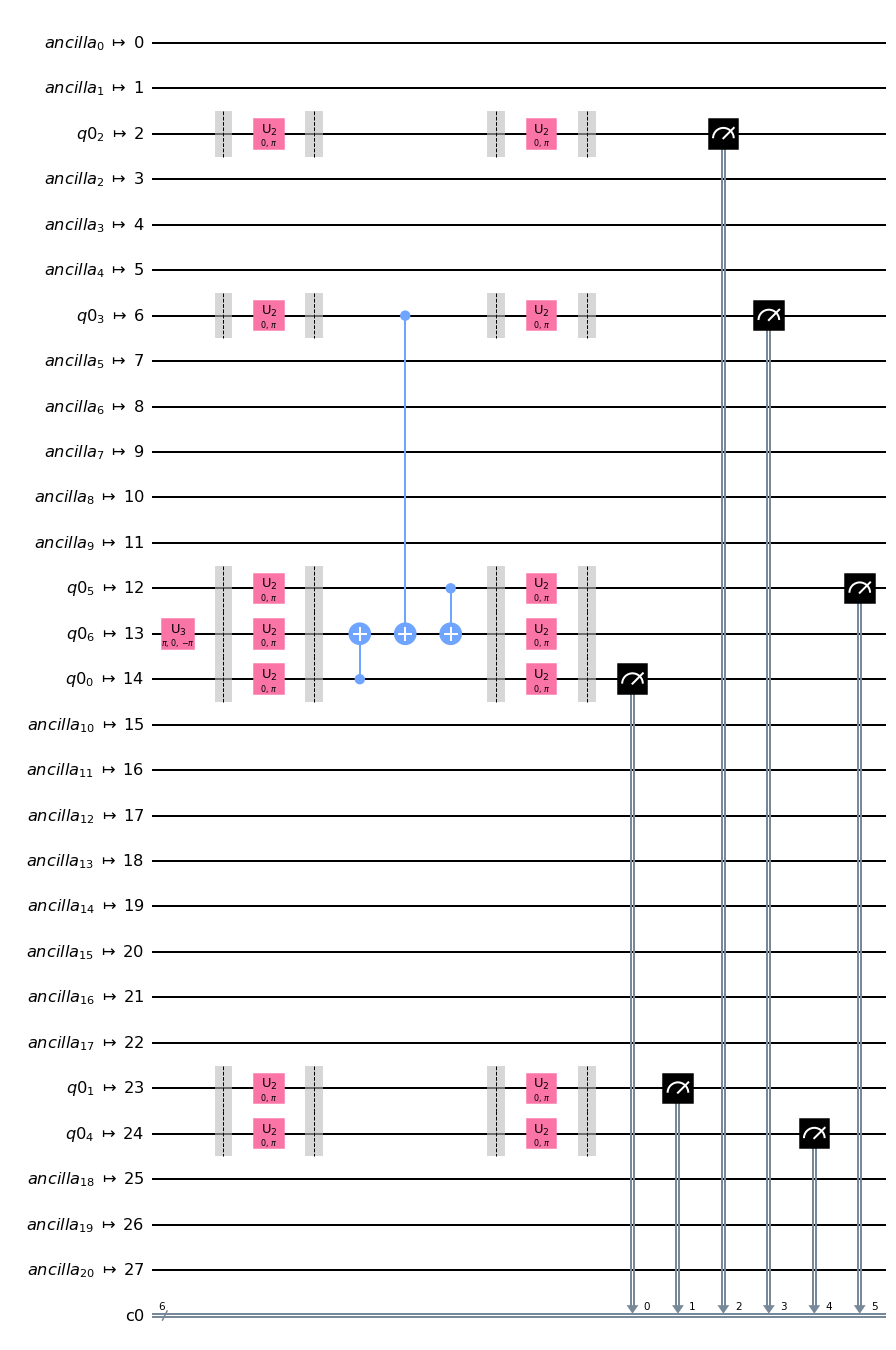

In [ ]:
qc2 = transpile(qc,device_simulation)
qc2.draw('mpl')

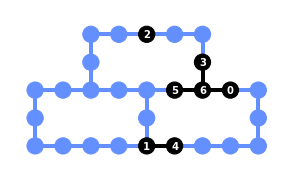

In [ ]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc2,device_simulation)

{'100011': 1, '000101': 1, '110001': 2, '000001': 6, '000000': 7, '111001': 6, '100000': 6, '001000': 6, '101001': 752, '101011': 3, '001001': 65, '100001': 81, '111000': 1, '101000': 80, '101101': 7}


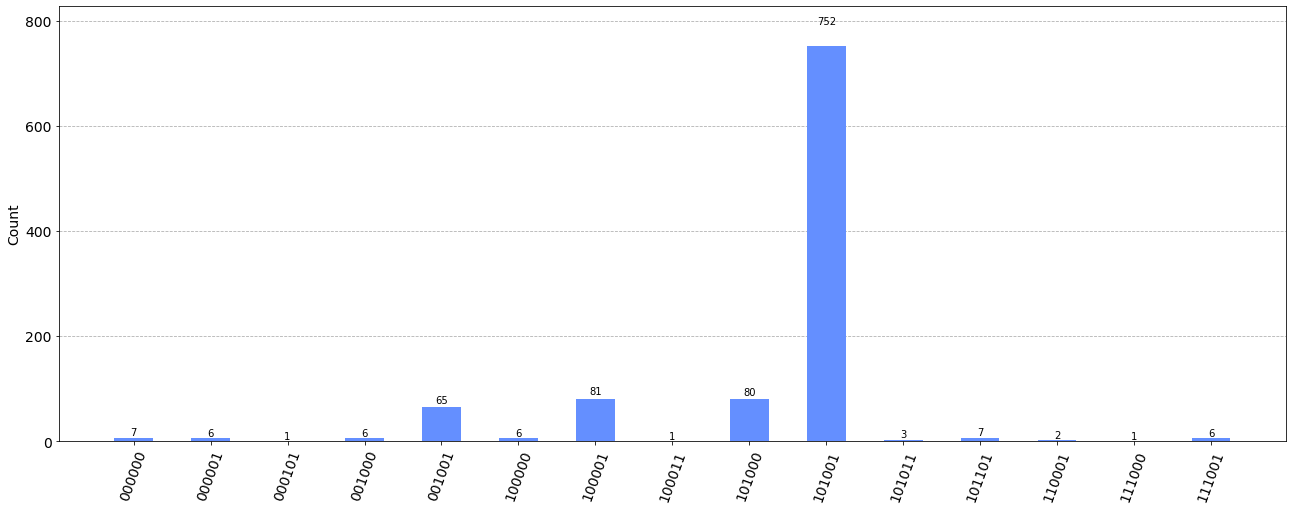

In [ ]:
job = device_simulation.run(qc2,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(22,8))

In [ ]:
secret = '100101'